In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [22]:
# Load the data


In [23]:
df=pd.read_csv('netflix_movies.csv')

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
df.dropna(subset=['type','release_year','rating','country','duration'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [26]:
df_count=df['type'].value_counts()

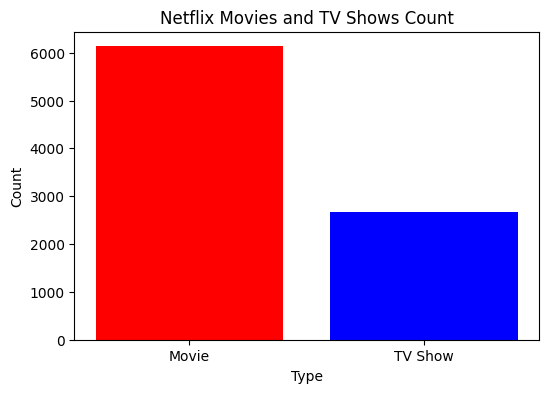

In [27]:
plt.figure(figsize=(6,4))
plt.bar(df_count.index, df_count.values, color=['red', 'blue'])
plt.title('Netflix Movies and TV Shows Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('netflix_count.png', dpi=300, bbox_inches='tight')

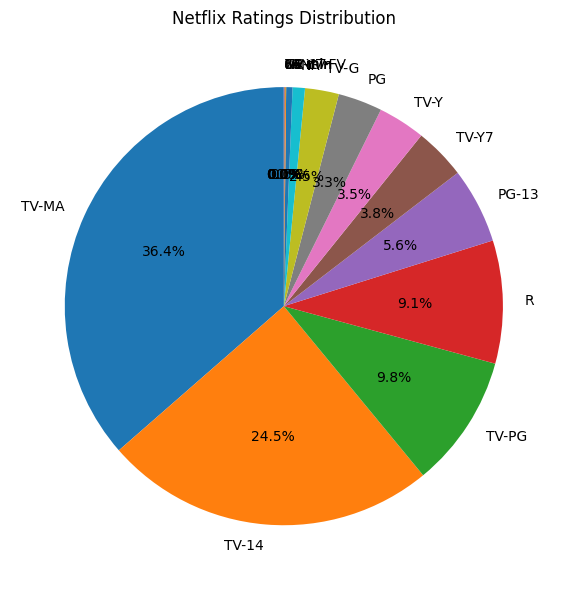

In [28]:
raitng_count = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(raitng_count, labels=raitng_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Netflix Ratings Distribution')
plt.tight_layout()
plt.savefig('netflix_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

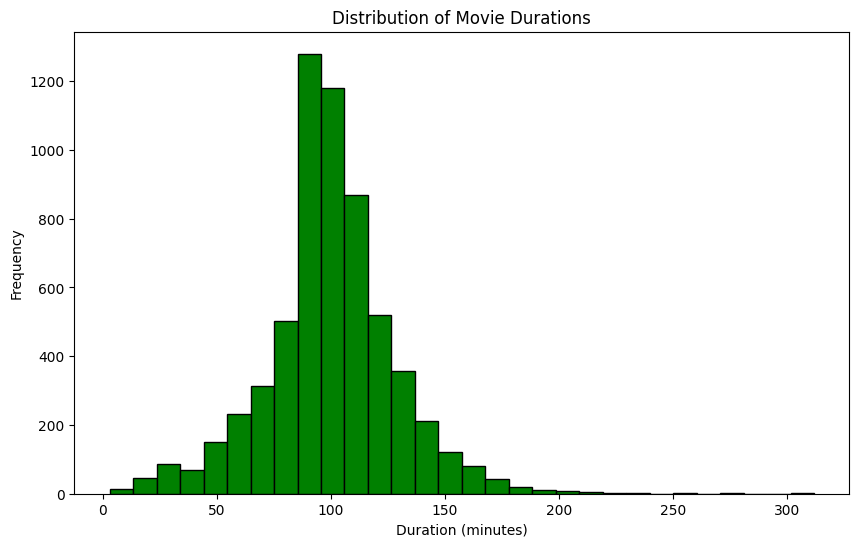

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter only movies and make a copy to avoid warnings
movie_df = df[df['type'] == 'Movie'].copy()

# Remove ' min' and handle missing values
movie_df['duration'] = (
    movie_df['duration']
    .str.replace(' min', '', regex=False)   # Remove text
    .replace('', pd.NA)                     # Replace empty strings with NaN
    .dropna()                                # Drop NaNs
    .astype(int)                             # Convert to int
)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_df['duration'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.savefig('movie_durations.png', dpi=300, bbox_inches='tight')
plt.show()


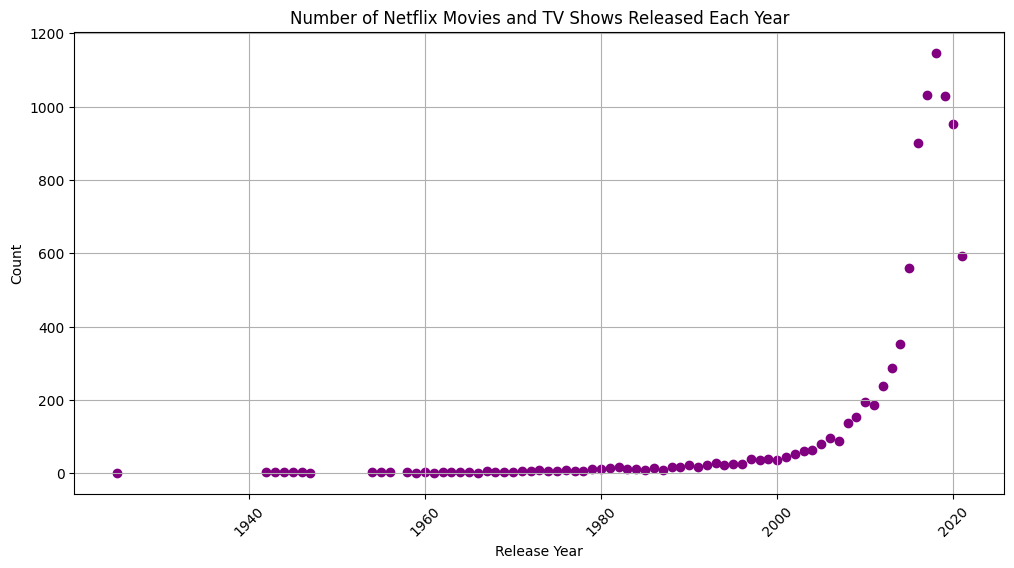

In [31]:
release_year_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.scatter(release_year_count.index, release_year_count.values, marker='o', linestyle='-', color='purple')
plt.title('Number of Netflix Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('release_years.png', dpi=300, bbox_inches='tight')
plt.show()


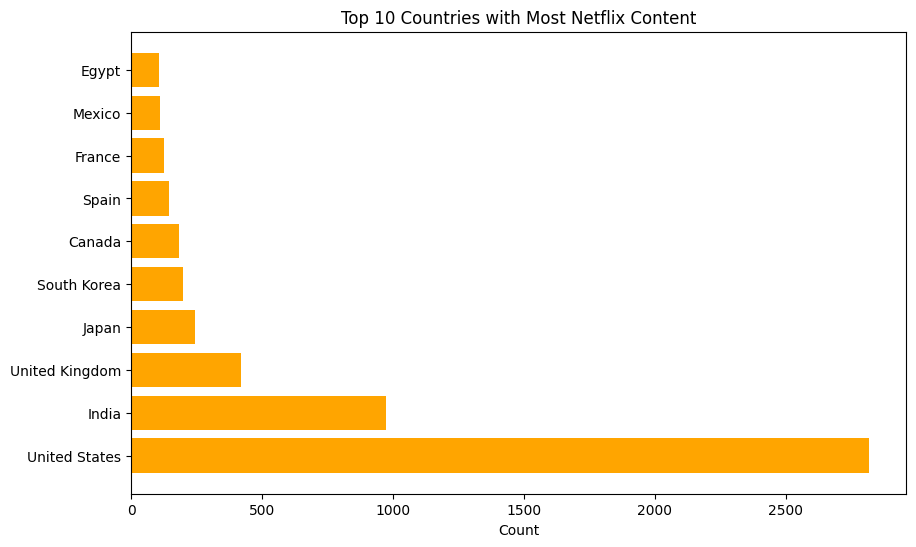

In [33]:
country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(country_count.index, country_count.values, color='orange')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Count')
plt.savefig('top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

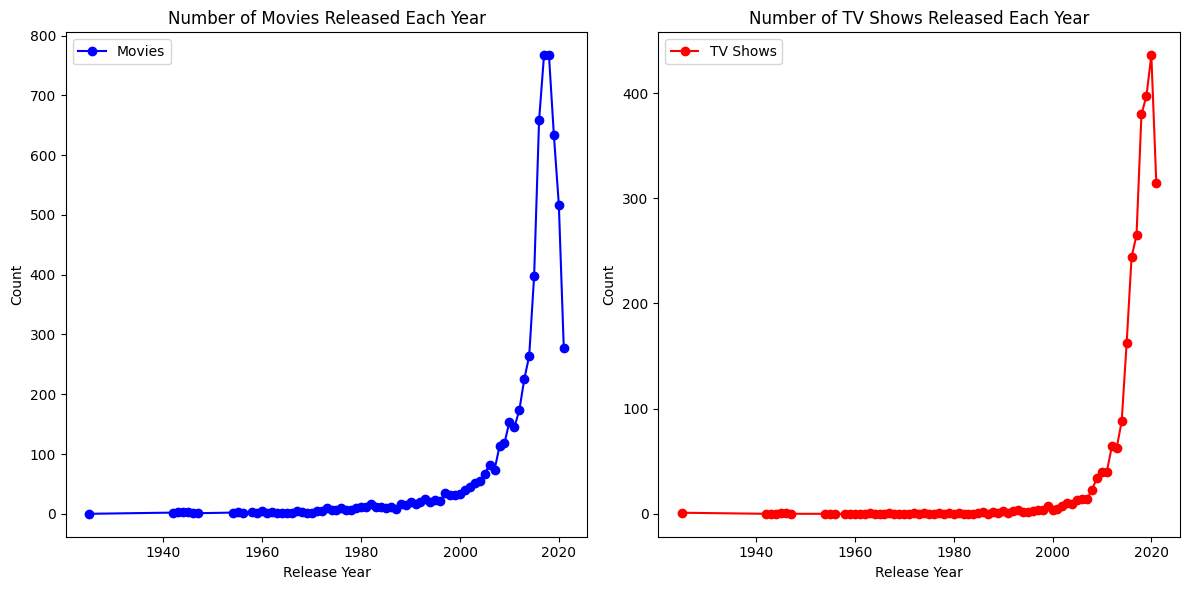

In [37]:
# Group data
content_by_year = df.groupby('release_year')['type'].value_counts().unstack().fillna(0)

# Create 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First plot - Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue', marker='o', label='Movies')
ax[0].set_title('Number of Movies Released Each Year')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Count')
ax[0].legend()

# Second plot - TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='red', marker='o', label='TV Shows')
ax[1].set_title('Number of TV Shows Released Each Year')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Count')
ax[1].legend()

# Layout and save
plt.tight_layout()
plt.savefig('content_by_year.png', dpi=300, bbox_inches='tight')
plt.show()
